In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

plt.rcParams["figure.dpi"] = 150
sns.set_style("whitegrid")

In [2]:
from utils import make_all

(
    coll_0_0_0,
    coll_260_0_0,
    coll_0_150_100,
    coll_0_150_100_f1,
    coll_0_150_100_pen,
    coll_0_150_100_pq07,
    df_fig_2,
    df_fig_a2,
    df_fig_a3,
    df_fig_a4,
    df_fig_a5,
) = make_all()

In [3]:
def plot_pct_minority(coll):
    f, ax = plt.subplots()
    sns.lineplot(
        x="year",
        y="pct_minority",
        hue="active",
        units="coll",
        data=coll,
        estimator=None,
        legend=False,
        lw=0.5,
        ax=ax,
        palette=["lightgray", "black"],
    )
    sns.lineplot(
        x="year",
        y="pct_minority",
        hue="active",
        data=coll,
        legend=False,
        lw=3,
        ci=None,
        ax=ax,
        palette=["darkgray", "black"],
    )
    ax.set(xlabel="Year", ylabel="Percent minority")
    return f

In [4]:
def plot_quality(coll):
    f, ax = plt.subplots()
    sns.lineplot(
        x="year",
        y="qual",
        hue="active",
        units="coll",
        data=coll,
        estimator=None,
        legend=False,
        lw=0.5,
        ax=ax,
        palette=["lightgray", "black"],
    )
    sns.lineplot(
        x="year",
        y="qual",
        hue="active",
        data=coll,
        legend=False,
        lw=3,
        ci=None,
        ax=ax,
        palette=["darkgray", "black"],
    )
    ax.set(xlabel="Year", ylabel="College quality")
    return f

In [5]:
def my_quiver(ax, rows, x, y, z, t0, t1):
    for _, row in rows:
        ax.annotate(
            "",
            xy=(row[(x, t1)], row[(y, t1)]),
            xytext=(row[(x, t0)], row[(y, t0)]),
            arrowprops=dict(
                arrowstyle="->",
                ec=["darkgray", "black"][int(row[(z, t0)])],
            ),
        )


def plot_minority_mean_ach(coll):
    df = coll[coll.index.get_level_values("year").isin([14, 29])].reset_index()
    f, ax = plt.subplots()  # TODO: aspect ratio
    sns.scatterplot(
        x="ach_mean",
        y="pct_minority",
        hue="active",
        data=df,
        legend=False,
        s=0,
        ax=ax,
    )
    my_quiver(
        ax,
        df.set_index(["year", "coll"]).unstack("year").iterrows(),
        "ach_mean",
        "pct_minority",
        "active",
        14,
        29,
    )
    ax.set(
        xlabel="Mean achievement of enrolled students",
        ylabel="Proportion minority students",
        xlim=(800, 1400),
        ylim=(0, 0.5),
    )
    return f

# Colleges

## Percent minority enrolled

### Figure 2

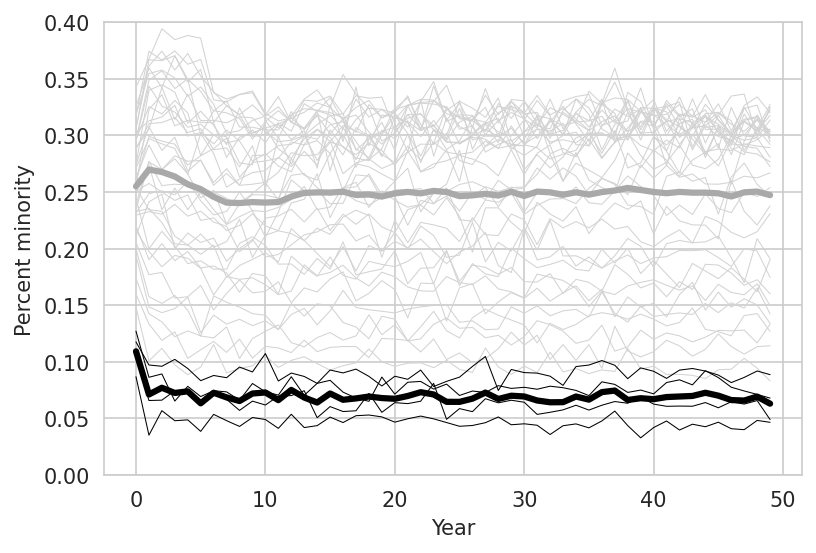

In [6]:
fig_c1 = plot_pct_minority(coll_0_0_0)
fig_c1.axes[0].set_ylim(0, .4)
fig_c1.savefig("figures/figC1.png", bbox_inches="tight")

### Figure 3

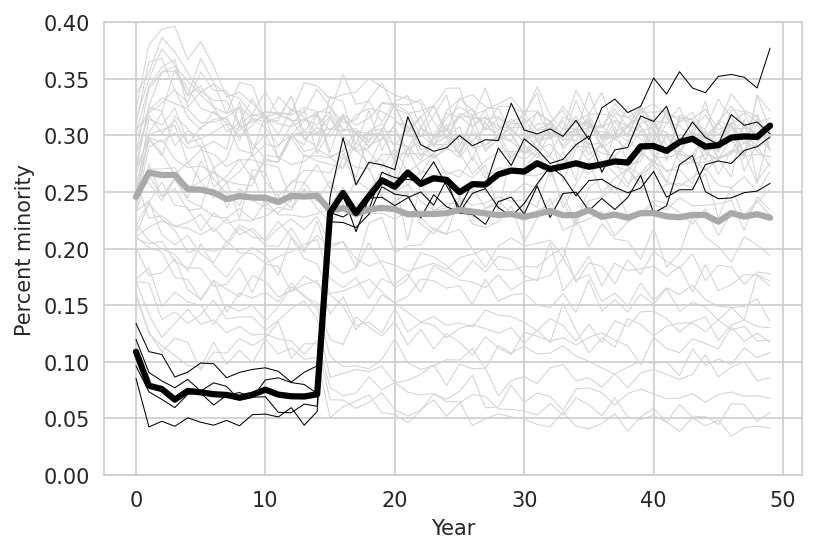

In [7]:
fig_c2 = plot_pct_minority(coll_260_0_0)
fig_c2.axes[0].set_ylim(0, .4)
fig_c2.savefig("figures/figC2.png", bbox_inches="tight")

### Figure 4

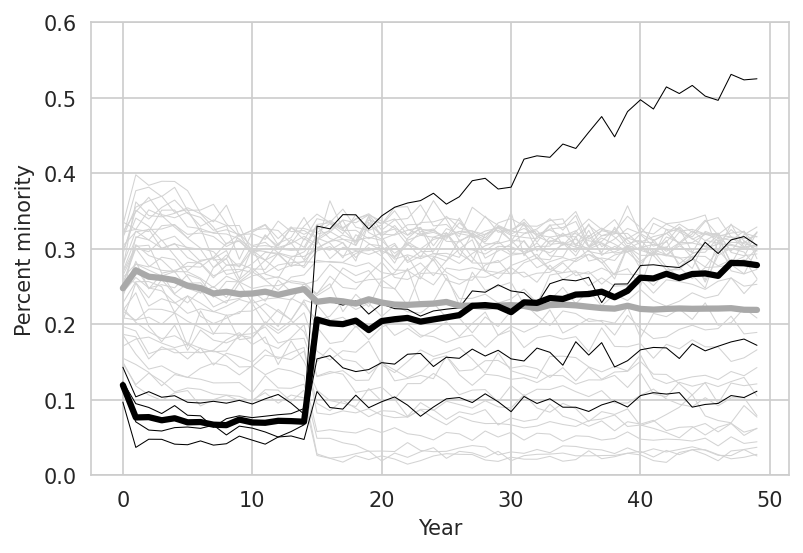

In [8]:
fig_c4 = plot_pct_minority(coll_0_150_100)
fig_c4.axes[0].set_ylim(0, .6)
fig_c4.savefig("figures/figC4.png", bbox_inches="tight")

### Figure A.12

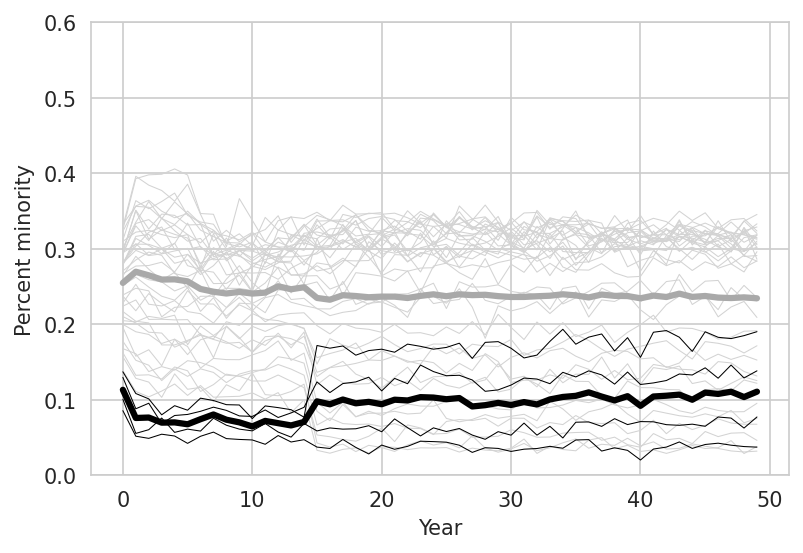

In [9]:
fig_c4_f1 = plot_pct_minority(coll_0_150_100_f1)
fig_c4_f1.axes[0].set_ylim(0, .6)
fig_c4_f1.savefig("figures/figC4_f1.png", bbox_inches="tight")

### Figure A.13

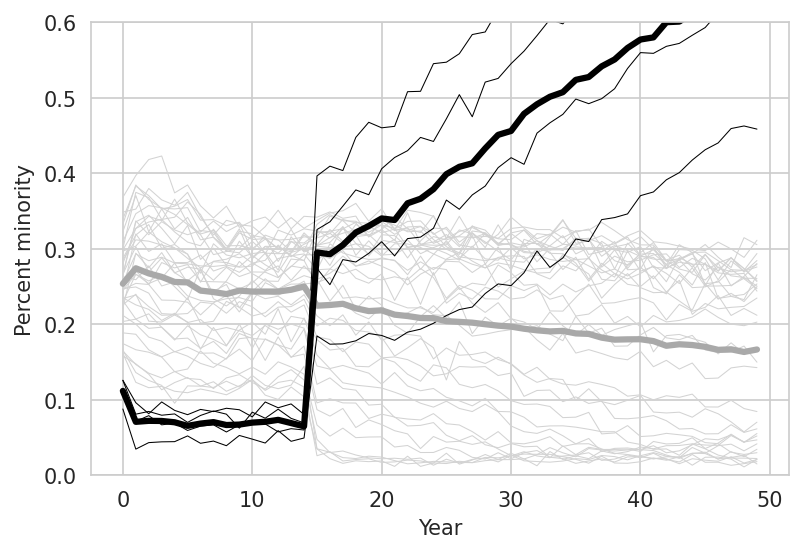

In [10]:
fig_c4_pen = plot_pct_minority(coll_0_150_100_pen)
fig_c4_pen.axes[0].set_ylim(0, .6)
fig_c4_pen.savefig("figures/figC4_pen.png", bbox_inches="tight")

### Figure A.14

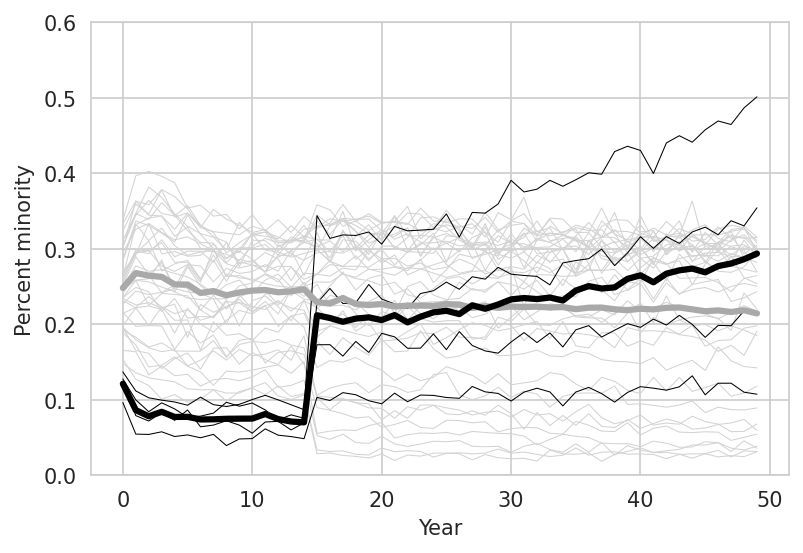

In [11]:
fig_c4_pq07 = plot_pct_minority(coll_0_150_100_pq07)
fig_c4_pq07.axes[0].set_ylim(0, .6)
fig_c4_pq07.savefig("figures/figC4_pq07.png", bbox_inches="tight")

## Quality
### Figure 5

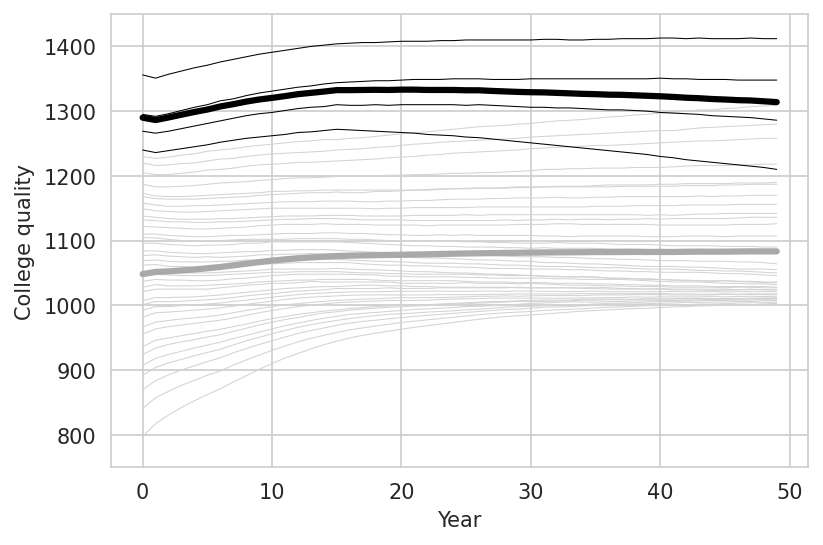

In [12]:
fig_c5 = plot_quality(coll_0_150_100)
fig_c5.axes[0].set_ylim(750, 1450)
fig_c5.savefig("figures/figC5.png", bbox_inches="tight")

### Figure 6

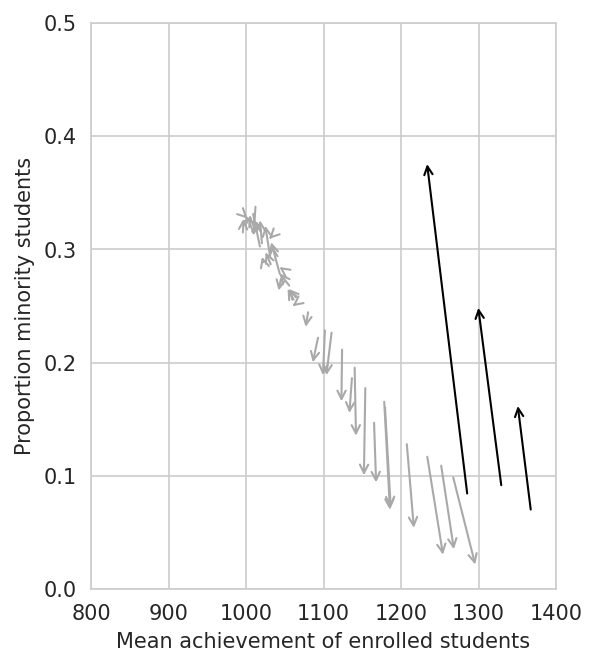

In [13]:
fig_3a = plot_minority_mean_ach(coll_0_150_100)
fig_3a.set_size_inches(4, 5)
fig_3a.savefig("figures/fig3a.png", bbox_inches="tight")

# Racial and SES groups
### Figure 7

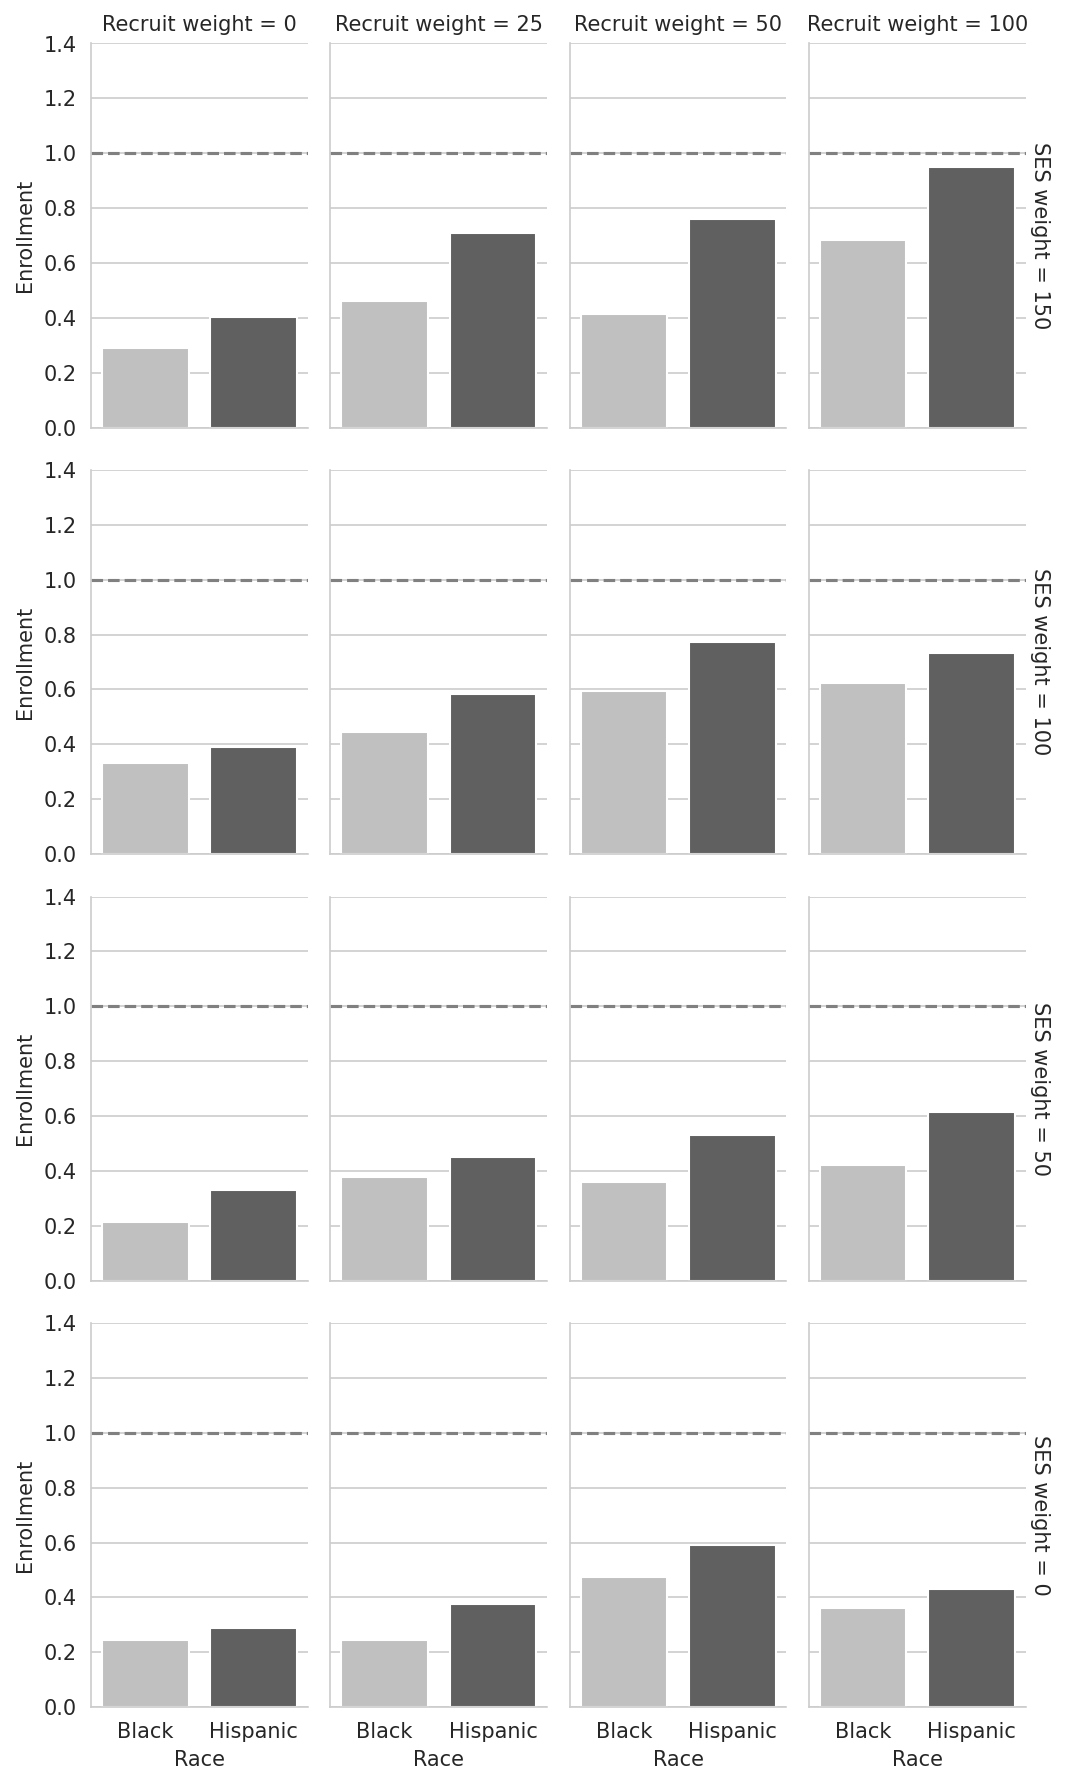

In [14]:
g = sns.FacetGrid(
    col="Recruit weight",
    row="SES weight",
    row_order=[150, 100, 50, 0],
    margin_titles=True,
    aspect=.6,
    data=df_fig_2.melt(
        id_vars=["SES weight", "Recruit weight"],
        var_name="Race",
        value_name="Enrollment"))

bw2 = ["#c0c0c0", "#606060"]

cmap = LinearSegmentedColormap.from_list("bw", bw2)

g.map(sns.barplot, "Race", "Enrollment", order=["Black", "Hispanic"], palette=bw2)

g.refline(y=1)

g.set(ylim=(0, 1.4))

g.tight_layout()

g.savefig("figures/fig2.png", bbox_inches="tight")

### Figure 8

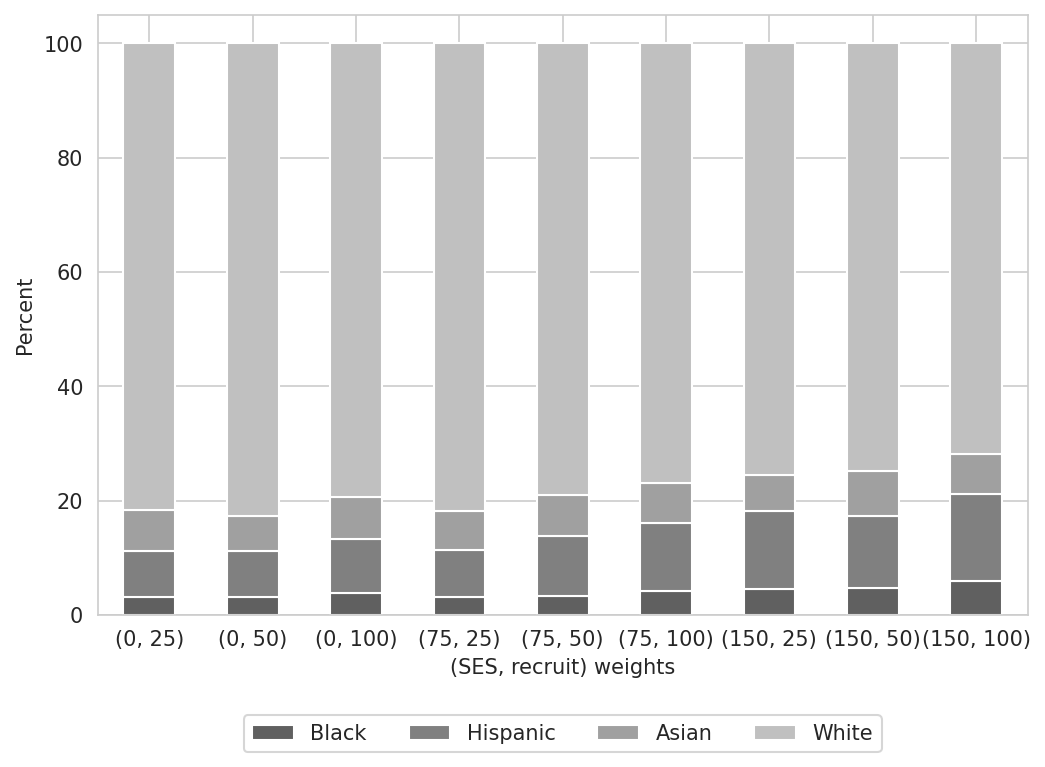

In [15]:
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list("bw", bw2[::-1])

order = ["Black", "Hispanic", "Asian", "White"]

fig_a2 = (
    df_fig_a2.set_index(["SES weight", "Recruit weight"])[order]
    .plot.bar(
        stacked=True,
        colormap=cmap,
        rot=0,
        figsize=(8, 5.3),
        xlabel="(SES, recruit) weights",
        ylabel="Percent",
    )
)
fig_a2.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=4)

fig_a2.figure.savefig("figures/figA2.png", bbox_inches="tight")

### Figure 9

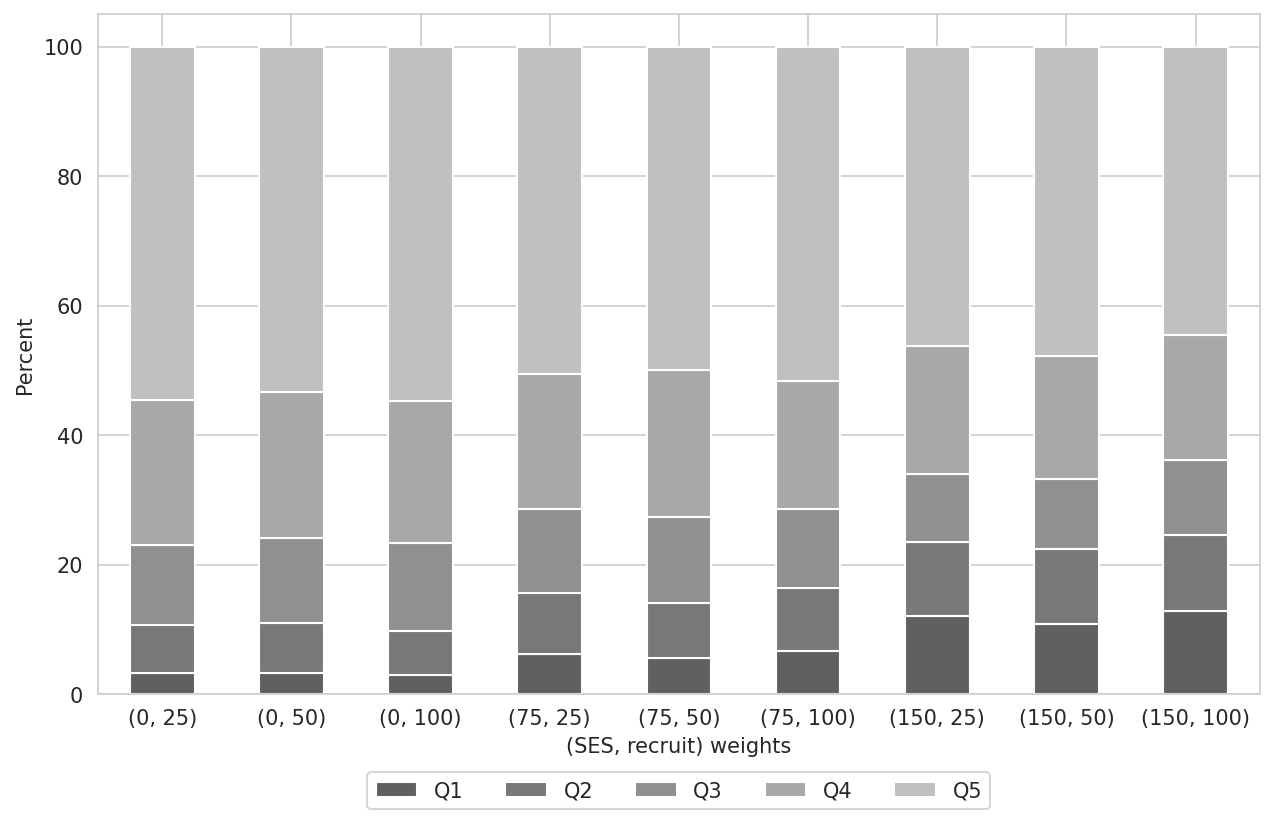

In [16]:
fig_a3 = (
    df_fig_a3.set_index(["SES weight", "Recruit weight"])
    .plot.bar(
        stacked=True,
        colormap=cmap,
        rot=0,
        figsize=(10, 6),
        xlabel="(SES, recruit) weights",
        ylabel="Percent",
    )
)
fig_a3.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5)

fig_a3.figure.savefig("figures/figA3.png", bbox_inches="tight")

### Figure 10

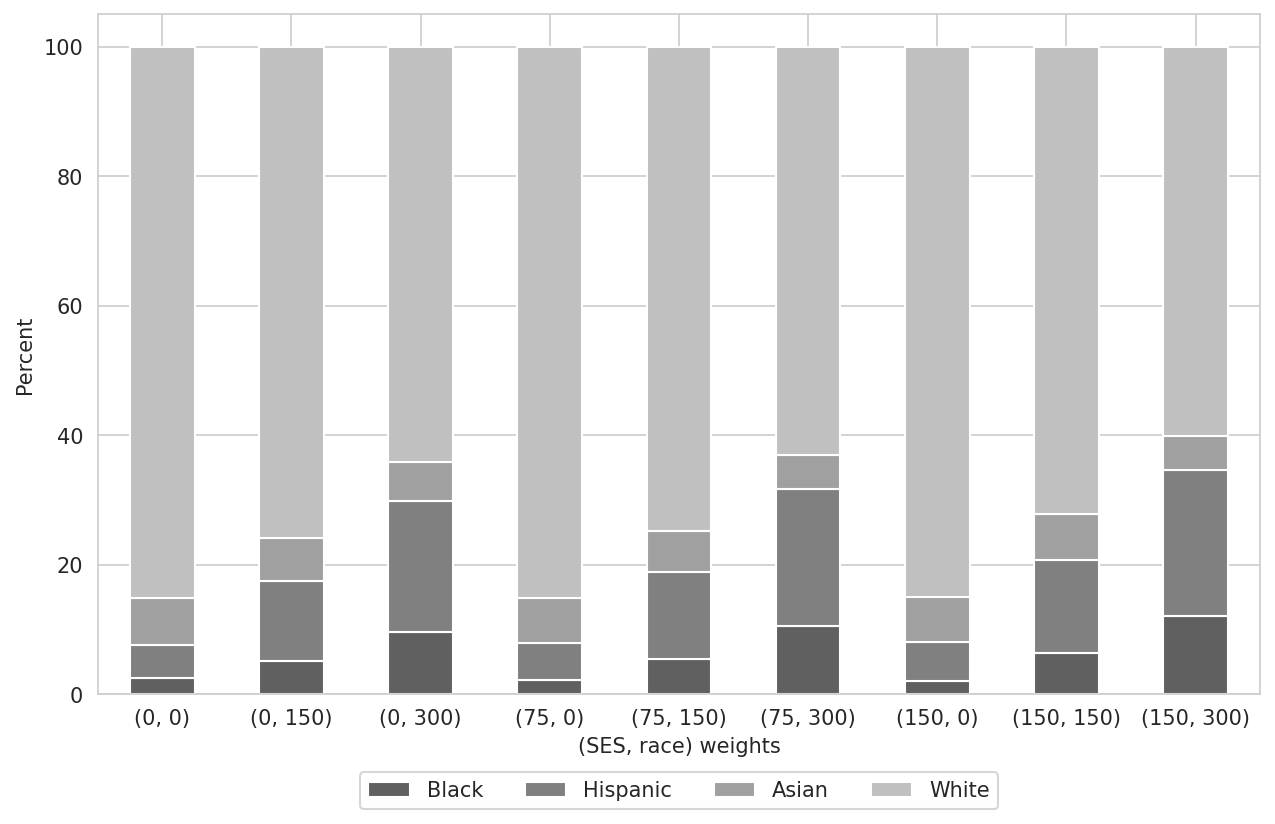

In [17]:
fig_a4 = (
    df_fig_a4.set_index(["SES weight", "Race weight"])[order]
    .plot.bar(
        stacked=True,
        colormap=cmap,
        rot=0,
        figsize=(10, 6),
        xlabel="(SES, race) weights",
        ylabel="Percent",
    )
)
fig_a4.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=4)

fig_a4.figure.savefig("figures/figA4.png", bbox_inches="tight")

### Figure 11

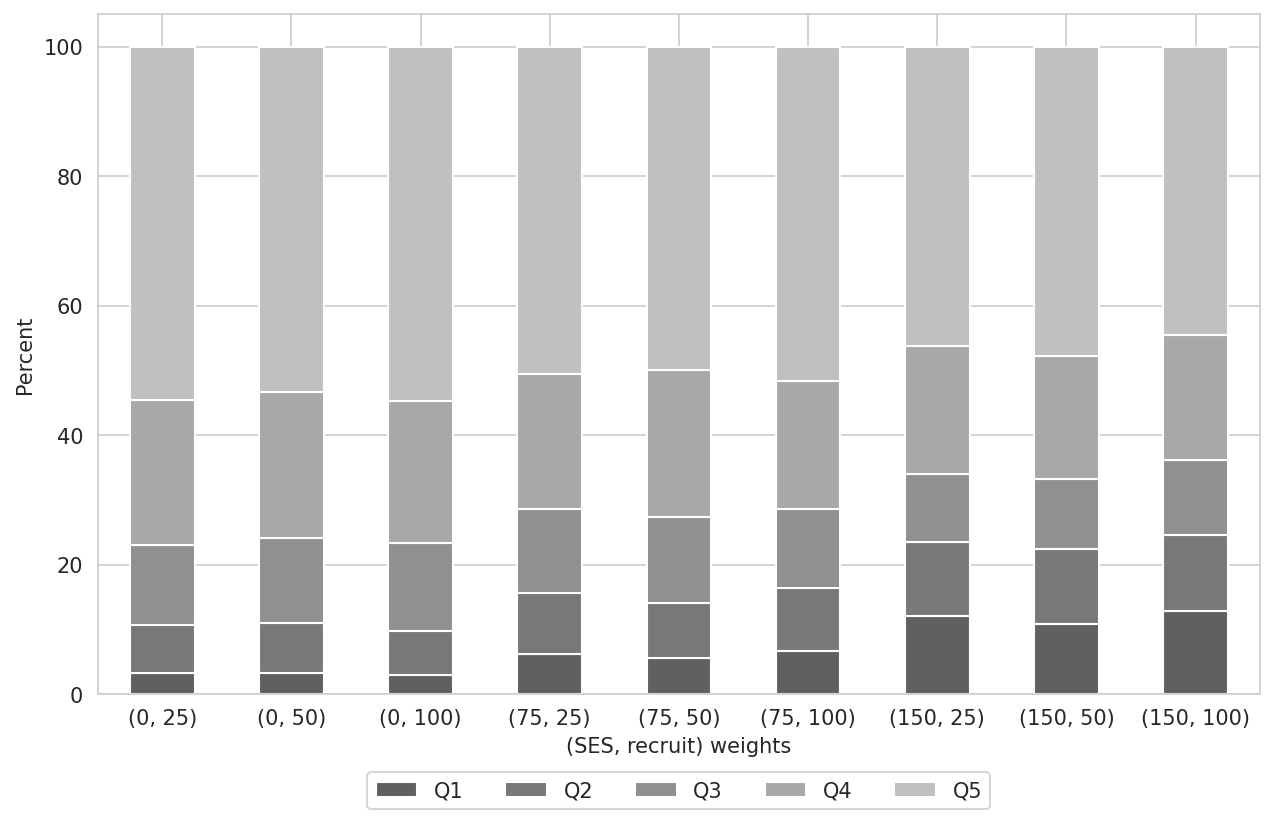

In [18]:
fig_a3 = (
    df_fig_a3.set_index(["SES weight", "Recruit weight"])
    .plot.bar(
        stacked=True,
        colormap=cmap,
        rot=0,
        figsize=(10, 6),
        xlabel="(SES, recruit) weights",
        ylabel="Percent",
    )
)
fig_a3.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5)

fig_a3.figure.savefig("figures/figA3.png", bbox_inches="tight")

### Figure 10

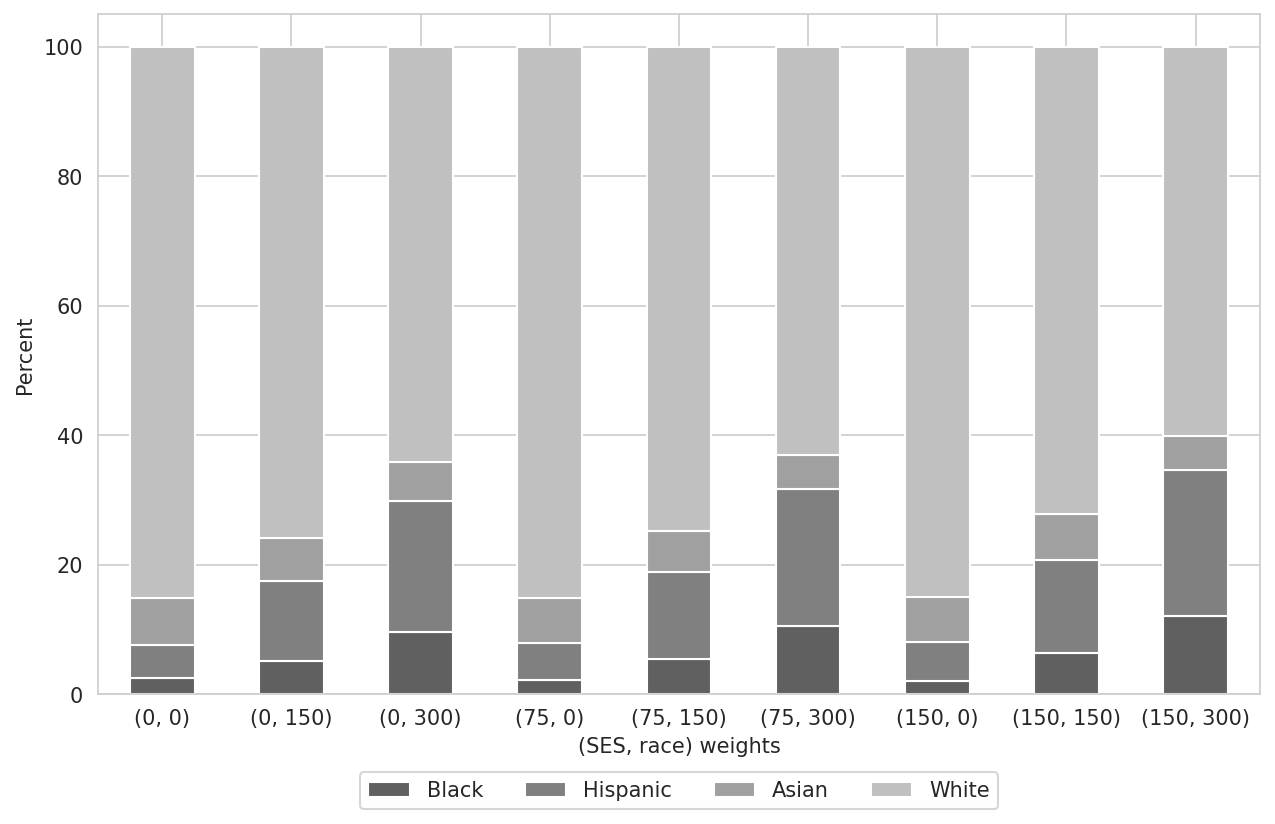

In [19]:
fig_a4 = (
    df_fig_a4.set_index(["SES weight", "Race weight"])[order]
    .plot.bar(
        stacked=True,
        colormap=cmap,
        rot=0,
        figsize=(10, 6),
        xlabel="(SES, race) weights",
        ylabel="Percent",
    )
)
fig_a4.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=4)

fig_a4.figure.savefig("figures/figA4.png", bbox_inches="tight")

### Figure 11

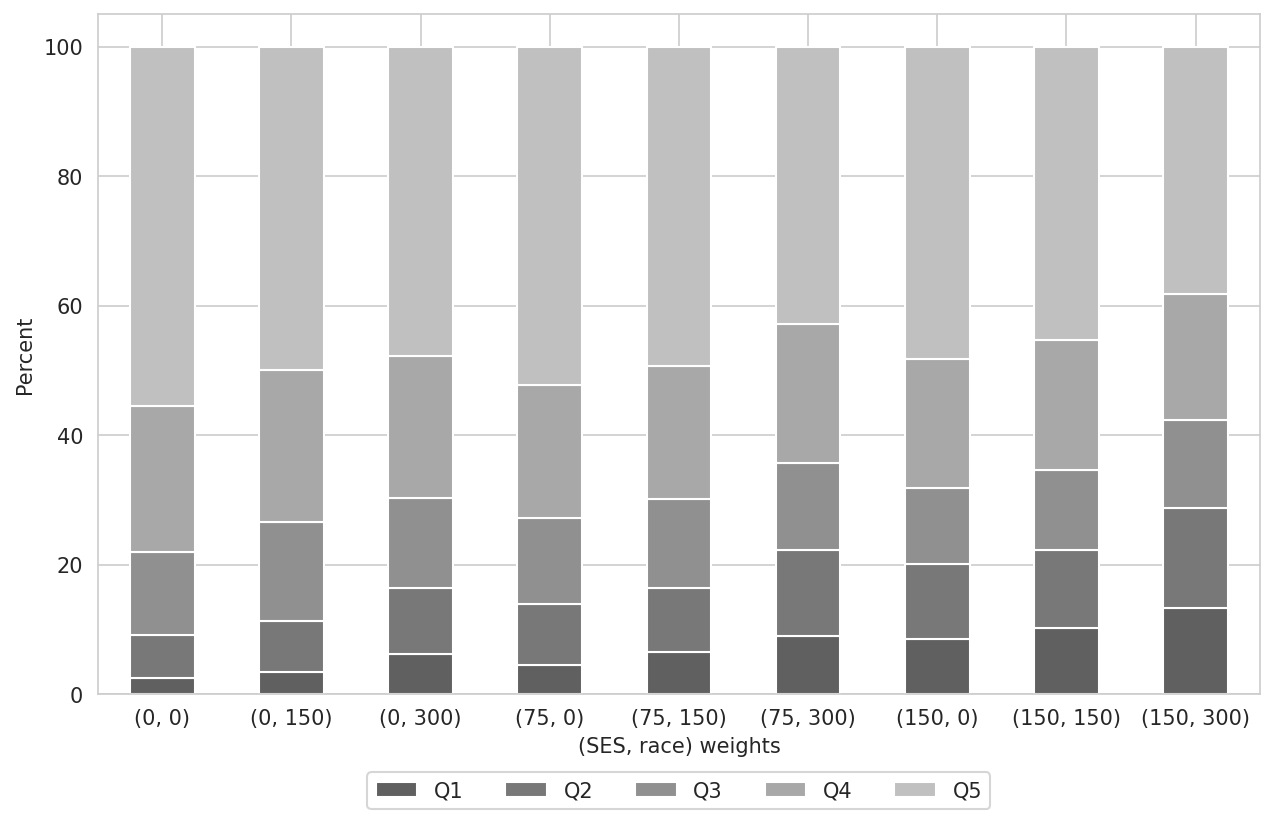

In [20]:
fig_a5 = (
    df_fig_a5.set_index(["SES weight", "Race weight"])
    .plot.bar(
        stacked=True,
        colormap=cmap,
        rot=0,
        figsize=(10, 6),
        xlabel="(SES, race) weights",
        ylabel="Percent",
    )
)
fig_a5.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=5)

fig_a5.figure.savefig("figures/figA5.png", bbox_inches="tight")